# AirBnB Dataset Exploration 
## by Aayush Soni

## Introduction
The dataset consists of three separate tables :
> * calendar.csv : This holds data of
> * listings.csv : This holds data of
> * reviews.csv : This holds data of

In our analysis we will try to answer these questions:
> * What is
> * Why is
> * What is the relation between



## 1. Preliminary Wrangling

In [1]:
## Initial imports and data loading
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing

df_calendar=pd.read_csv('calendar.csv')
df_listings=pd.read_csv('listings.csv')
df_reviews=pd.read_csv('reviews.csv')

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Explore calendar
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


We see that price is stored as an object. Price is NaN when 'available' field is 'f' i.e. False. 
Apart from price column, no data is missing.

In [4]:
#df_calendar.price.apply(lambda x : x[1:].replace(',',''))
df_calendar.price = df_calendar.price.fillna("$-1.00").apply(lambda x : x[1:].replace(',','')).astype(float)

In [5]:
df_calendar.date = pd.to_datetime(df_calendar.date)

Now lets work on listings

In [6]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

Most of these are of no interest to us. Let's remove the columns we dont need..
E.g. -
.*URL - will not be used
City/state - equal for all values
square_Feet,license - most/ all NaN's

In [8]:
cols_to_remove=['listing_url','scrape_id','last_scraped', 'experiences_offered','thumbnail_url',
                'medium_url','picture_url','xl_picture_url','host_url','host_thumbnail_url','host_picture_url',
                'host_total_listings_count','city','state','market','smart_location','country_code','country',
                'calendar_last_scraped','requires_license','license','jurisdiction_names','square_feet','neighbourhood']

df_listings.drop(cols_to_remove,axis=1,inplace=True)

In [9]:
# What is the percentage of columns have NaN's ?
(df_listings.isna().sum().sort_values(ascending=False)).head(30)


monthly_price                  2301
security_deposit               1952
weekly_price                   1809
notes                          1606
neighborhood_overview          1032
cleaning_fee                   1030
transit                         934
host_about                      859
host_acceptance_rate            773
review_scores_accuracy          658
review_scores_checkin           658
review_scores_value             656
review_scores_location          655
review_scores_cleanliness       653
review_scores_communication     651
review_scores_rating            647
last_review                     627
first_review                    627
reviews_per_month               627
space                           569
host_response_rate              523
host_response_time              523
host_neighbourhood              300
summary                         177
bathrooms                        16
host_location                     8
zipcode                           7
bedrooms                    

In [10]:
# Count NaN's
df_listings.zipcode.isna().sum()

7

In [11]:
#USe most common area name to fill in the missing zip codes
f = lambda x: x.mode().iloc[0]
df_listings.zipcode = df_listings.zipcode.fillna(df_listings.groupby('neighbourhood_cleansed').transform(f).zipcode)

In [12]:
df_listings.zipcode.value_counts()

zipcode
98122        421
98103        394
98102        341
98105        225
98109        202
98101        201
98144        201
98121        196
98107        181
98115        178
98112        167
98117        164
98118        154
98119        145
98116        112
98104         95
98125         71
98199         66
98126         63
98106         58
98108         56
98133         46
98136         44
98177         19
98178          7
98146          5
98134          5
99\n98122      1
Name: count, dtype: int64

We see some data error for one of the zipcodes... It's likely 98112, but lets check and verify that using the other columns

In [13]:
#df_listings.loc[df_listings.zipcode=='99\n98122']
print("Neighbourhood of erroneous zipcode is :\n ",df_listings.loc[df_listings.zipcode=='99\n98122']['neighbourhood_cleansed'])
df_listings.loc[df_listings.neighbourhood_cleansed=='Minor'].groupby('zipcode').count()

Neighbourhood of erroneous zipcode is :
  859    Minor
Name: neighbourhood_cleansed, dtype: object


,id,name,summary,space,description,neighborhood_overview,notes,transit,host_id,host_name,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
zipcode,,,,,,,,,,,,,,,,,,,,,
98122,133,133,131,120,133,107,89,107,133,133,...,122,122,122,122,133,133,133,133,133,122
98144,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
99\n98122,1,1,1,0,1,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1


Since zipcode of "Minor" is 98122 by a large margin, we can safely say thats what it likely was

In [14]:
df_listings.zipcode = df_listings.zipcode.str.split('\n').str[-1]


In [15]:
df_listings.price = df_listings.price.apply(lambda x :x[1:].replace(',','')).astype(float)
df_listings.first_review = pd.to_datetime(df_listings.first_review)
df_listings.last_review = pd.to_datetime(df_listings.last_review)

## 2. Data Analysis
### 2.a What is the distribution of houses in airbnb zipcodes?

In [16]:
#df_listings.groupby('neighbourhood_cleansed').id.count().sort_values(ascending=0)
df_listings.groupby('neighbourhood_cleansed').id.count().sort_values(ascending=0)


neighbourhood_cleansed
Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
South Beacon Hill      4
Pinehurst              4
South Park             3
Roxhill                2
Name: id, Length: 87, dtype: int64

In [17]:
#df_listings.groupby(['zipcode','property_type']).price.mean()
df_listings.groupby('property_type').id.count().sort_values(ascending=0)

property_type
House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: id, dtype: int64

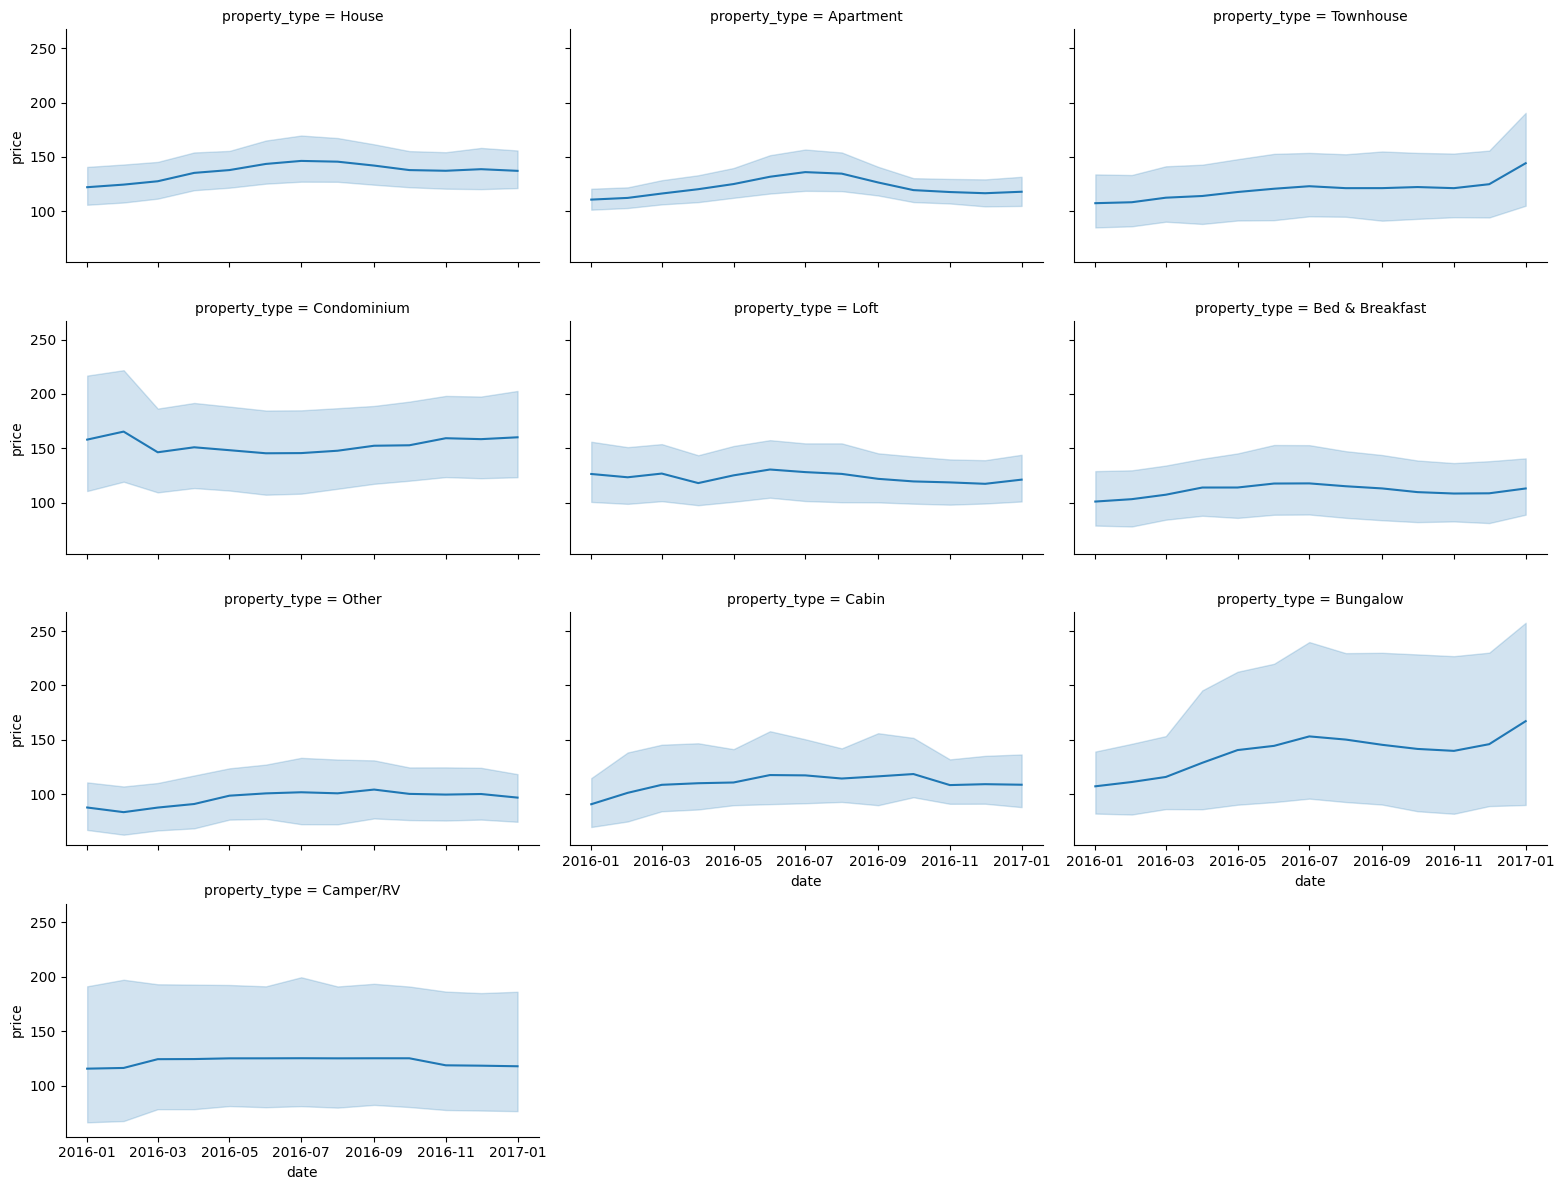

In [18]:
#create a table of listing id -> property_type
prop_type_order=df_listings.groupby('property_type').id.count().sort_values(ascending=0).head(10).index
zip_count = 25
zipcode_of_interest=df_listings.groupby('zipcode').id.count().sort_values(ascending=0).head(zip_count).index.tolist()
#print(zipcode_of_interest)
df_prop = pd.merge(df_calendar,df_listings[['property_type','id','zipcode']],left_on='listing_id',right_on='id').drop('id',axis=1)
df_prop['year']=df_prop.date.dt.year
df_prop['month']=df_prop.date.dt.month
#df_prop = df_prop.loc[df_prop.price>0].loc[df_prop.property_type.isin(interesting_properties)].groupby(['year','month','property_type','zipcode'],as_index=False).price.mean()
df_prop = df_prop.loc[df_prop.price>0].groupby(['year','month','property_type','zipcode'],as_index=False).price.mean()
df_prop['date']=pd.to_datetime(df_prop.year.astype(str)+'-'+df_prop.month.astype(str),format='%Y-%m')
#df_prop.head()
#df_prop.loc[df_prop['zipcode'].isin(zipcode_of_interest)]#.loc[df_prop.property_type=='Apartment']
#sns.lineplot(data=df_prop.loc[df_prop.property_type=='Condominium'].loc[df_prop['zipcode'].isin(zipcode_of_interest)],x='date',y='price',hue='zipcode')

g = sns.FacetGrid(data=df_prop.loc[df_prop['zipcode'].isin(zipcode_of_interest)],col='property_type',col_order=prop_type_order,col_wrap=3, aspect=1.75)

g.map(sns.lineplot,'date','price')
#plt.plot()
#g.set_xticklabels(df_prop.date.unique().tolist(),rotation = 15)


<Axes: >

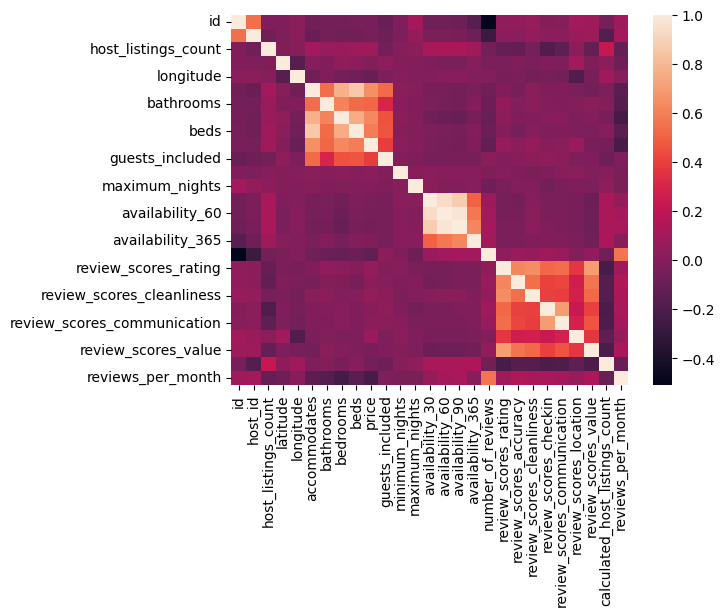

In [19]:
c=df_listings.corr(numeric_only=True)
sns.heatmap(c)#,annot=True,fmt=".1f");
#df_listings.corr(numeric_only=True).index.tolist().index('price')


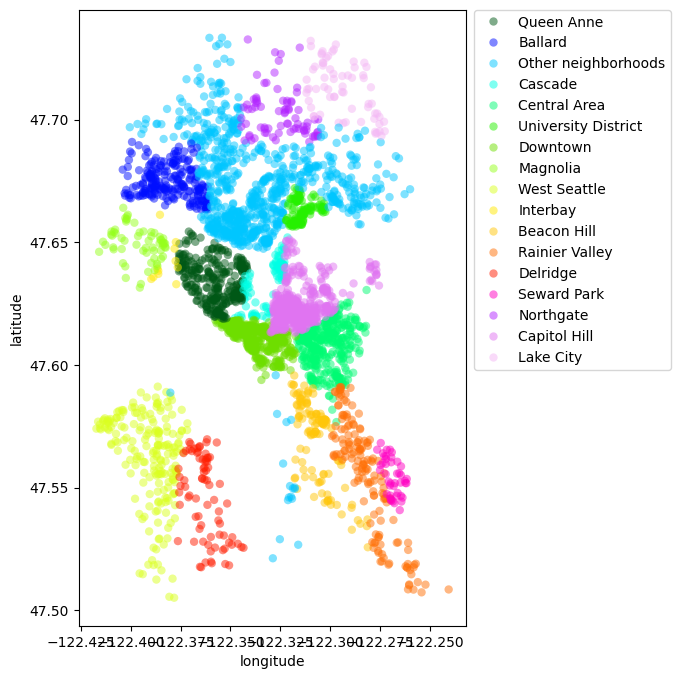

In [20]:
fig,axes= plt.subplots(1,1,figsize=(5,8))
pal='gist_ncar'
sns.scatterplot(data=df_listings,y='latitude',x='longitude',hue='neighbourhood_group_cleansed',palette=pal,linewidth=0,alpha=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#sns.scatterplot(data=df_listings,y='latitude',x='longitude',hue='neighbourhood_group_cleansed',palette='gist_ncar',linewidth=0,alpha=0.5,ax=axes[1])


In [21]:
l=set()
for i in df_listings.amenities.tolist():
    j=set(j for j in i[1:-1].split(',') if j)
    l=l.union(j)
#df_listings.amenities.tolist()[0]
l

{'"24-Hour Check-in"',
 '"Air Conditioning"',
 '"Buzzer/Wireless Intercom"',
 '"Cable TV"',
 '"Carbon Monoxide Detector"',
 '"Elevator in Building"',
 '"Family/Kid Friendly"',
 '"Fire Extinguisher"',
 '"First Aid Kit"',
 '"Free Parking on Premises"',
 '"Hair Dryer"',
 '"Hot Tub"',
 '"Indoor Fireplace"',
 '"Laptop Friendly Workspace"',
 '"Lock on Bedroom Door"',
 '"Other pet(s)"',
 '"Pets Allowed"',
 '"Pets live on this property"',
 '"Safety Card"',
 '"Smoke Detector"',
 '"Smoking Allowed"',
 '"Suitable for Events"',
 '"Washer / Dryer"',
 '"Wheelchair Accessible"',
 '"Wireless Internet"',
 'Breakfast',
 'Cat(s)',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'Essentials',
 'Gym',
 'Hangers',
 'Heating',
 'Internet',
 'Iron',
 'Kitchen',
 'Pool',
 'Shampoo',
 'TV',
 'Washer'}

In [22]:
for i in l:
    #print(i)
    df_listings[i]=df_listings.amenities.apply(lambda x : i in x)
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 109 entries, id to Kitchen
dtypes: bool(41), datetime64[ns](2), float64(15), int64(12), object(39)
memory usage: 2.1+ MB


In [117]:
#predict based on below columns:
#host_response_time
#host_response_rate
#host_is_superhost
#zipcode
#property_type
#room_type
#accommodates
#bathrooms
#bedrooms
#beds
#all amenities columns, l


df_listings_cleaned=df_listings.loc[df_listings.property_type.isin(prop_type_order)][['host_response_time','host_response_rate','host_is_superhost','zipcode','property_type','room_type','accommodates','bathrooms','bedrooms','beds']+list(l)+['price']].dropna()
df_listings_cleaned.host_response_rate=df_listings_cleaned.host_response_rate.apply(lambda x : int(x[:-1]))
df_listings_cleaned=pd.get_dummies(data=df_listings_cleaned, columns=['host_response_time','property_type','room_type'])
df_listings_cleaned.drop_duplicates(inplace=True)


df_X=df_listings_cleaned.drop('price',axis=1)
df_X.host_is_superhost= df_X.host_is_superhost.apply(lambda x : x=='t')
df_X.zipcode=df_X.zipcode.astype(int)
df_X.zipcode = df_X.zipcode - df_X.zipcode.min() 
#df_X = preprocessing.normalize(df_X, norm='l2',axis=0)

df_y=df_listings_cleaned['price']


df_X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3210 entries, 0 to 3817
Data columns (total 65 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   host_response_rate                     3210 non-null   int64  
 1   host_is_superhost                      3210 non-null   bool   
 2   zipcode                                3210 non-null   int32  
 3   accommodates                           3210 non-null   int64  
 4   bathrooms                              3210 non-null   float64
 5   bedrooms                               3210 non-null   float64
 6   beds                                   3210 non-null   float64
 7   "Elevator in Building"                 3210 non-null   bool   
 8   Iron                                   3210 non-null   bool   
 9   "Indoor Fireplace"                     3210 non-null   bool   
 10  Dryer                                  3210 non-null   bool   
 11  "Carbon M

In [118]:
#from sklearn import svm



X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = .30, random_state=42)


In [119]:
#clf = svm.SVC()
clf = LinearRegression()
clf.fit(X_train, y_train)
#pd.get_dummies(data=X_train, columns=['host_response_time'])
#X_train.info()

LinearRegression()

In [120]:
y_test_preds = clf.predict(X_test)
y_train_preds = clf.predict(X_train)

test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print(test_score)
print(train_score)

0.49651145375477945
0.6158936773483645


In [136]:
#print(prop_type_order)
prop_type_pred=[]

for pt in prop_type_order :#[i for i in df_listings_cleaned.columns if 'property_type' in i]:
    df_house = df_listings_cleaned.loc[df_listings_cleaned['property_type_'+pt]==True]
   
    df_X=df_house.drop('price',axis=1)
    df_X.host_is_superhost= df_X.host_is_superhost.apply(lambda x : x=='t')
    df_X.zipcode=df_X.zipcode.astype(int)
    df_X.zipcode = df_X.zipcode - df_X.zipcode.min() 
    #df_X = preprocessing.normalize(df_X, norm='l2')
    
    df_y=df_house['price']
    
    y_test_preds = clf.predict(df_X)
    prop_type_pred.append(r2_score(df_y,y_test_preds))
    #print(pt,r2_score(df_y,y_test_preds),sep='\t'*(2-len(pt)//8))




<Axes: xlabel='R2 Score', ylabel='Property Type'>

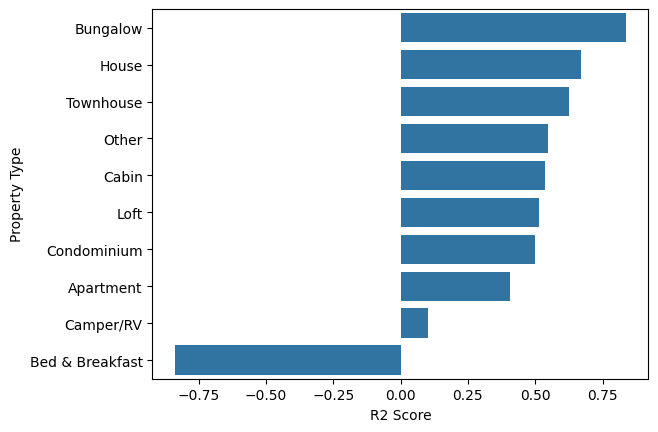

In [153]:
#prop_type_pred
df_pred=pd.DataFrame([ [i,j] for i,j in zip(prop_type_order,prop_type_pred)], columns=['Property Type', 'R2 Score'])
df_pred=df_pred.sort_values(by='R2 Score',ascending=False)
#sns.barplot(data=df_pred,)
sns.barplot(data=df_pred,y='Property Type',x='R2 Score')